# **ANÁLISIS CUANTITATIVO**
PRIMER EXAMEN
<br>
Luisa F. Giraldo Correa
<br>
Juan Sebastián Guzman G.

## **NUMERAL 2**
 Para este numeral, se realiza un análisis univariante y bivariante al conjunto de datos del fichero Data_Exam1.xlsx. Posteriormente, se realiza una transformación mediante la función logarítmica natural de la Variable "X",  con base en el  comportamiento entre las variables  "X" y "Y", observado mediante un acercamiento gráfico.




In [97]:
import pandas as pd
import matplotlib.pyplot as plt


#lectura del Data set
df2 = pd.read_excel("data_exam1.xlsx", sheet_name="data2")
df2.head()

,Y,X
0,12.189142,0.226957
1,12.187456,0.088938
2,11.782692,0.199069
3,5.732032,0.003812
4,7.026970,0.004573


# Análisis univariante

En un primer acercamiento univariante a los datos mediante la función "Describe" de Pandas, y complementándolo con una revisión gráfica por medio de diagramas de cajas para el comportamiento de los datos de las variables "X" y "Y", se resaltan los siguientes puntos:

<br>

*Variable X*
<br>
Los valores de la variable X, presentan un valor medio de 0.07234, con una desviación estándar de 0.09753.

*El primer cuartil (25%) es aproximadamente 0.0085.
<br>
*La mediana de X (50%) es aproximadamente 0.0366.
<br>
*El tercer cuartil (75%) de los valores de X es aproximadamente 0.0999.
<br>
*El valor máximo de "X" es aproximadamente 0.9397, lo que sugiere que hay valores muy grandes presentes en los datos.
<br>

Mediante los datos anteriores y complementando con la información gráfica presentada en los sigientes gráficos, se resalta para los valores de X que: presentan una distribución sesgada hacia la derecha, que la  media (0.07234) es significativamente mayor que la mediana (0.0366) y que hay presencia de valores atípicos considerablemente superiores en el último cuartil.

<br>

*Variable Y*
<br>
Los valores de la variable "Y", presentan un valor medio de 9.4456, con una desviación estándar de 3.90818.

El 25% de los datos de Y están por debajo de aproximadamente 7.41, el 50% de los datos de Y están por debajo de aproximadamente 10.07, y el 75% de los datos de "Y" están por debajo de aproximadamente 12.08.

Mediante los datos anteriores y complementando con la información gráfica presentada en los sigientes gráficos, se resalta para los valores de Y que: presentan una distribución sesgada hacia la izquierda, se encuentran valores atípicos significativamente menores en el primer cuartil.  


In [342]:
df2.describe()

,Y,X
count,1000.000000,1.000000e+03
mean,9.445622,7.234805e-02
std,3.908189,9.753985e-02
min,-12.073239,1.343729e-08
25%,7.411486,8.450417e-03
50%,10.072134,3.655172e-02
75%,12.082546,9.992523e-02
max,17.838788,9.397465e-01


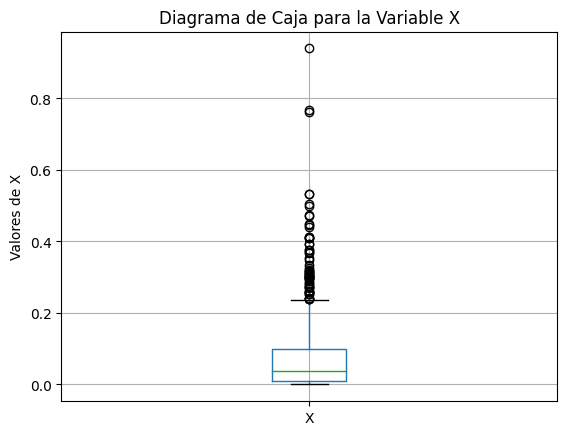

In [343]:
# Diagrama de cajas para la columna X
df2.boxplot(column='X')
plt.title('Diagrama de Caja para la Variable X')
plt.ylabel('Valores de X')

plt.show()

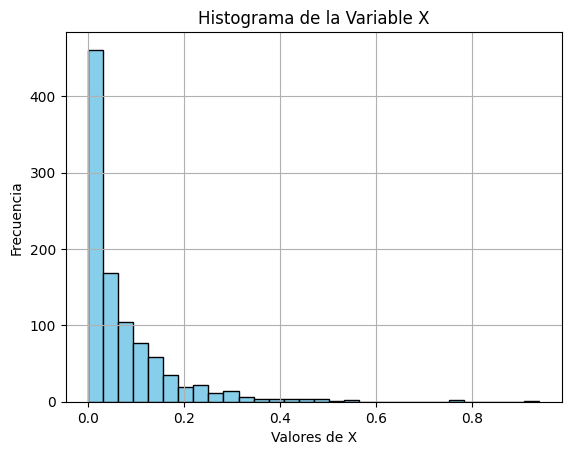

In [344]:

# Histograma para la columna X
plt.hist(df2['X'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histograma de la Variable X')
plt.xlabel('Valores de X')
plt.ylabel('Frecuencia')
plt.grid(True)

plt.show()

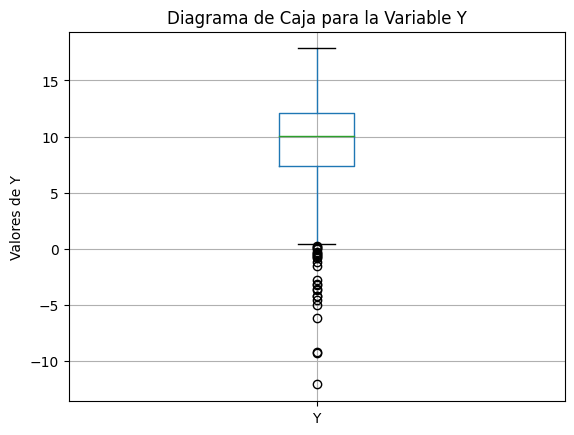

In [345]:

# Diagrama de cajas para la columna Y
df2.boxplot(column='Y')
plt.title('Diagrama de Caja para la Variable Y')
plt.ylabel('Valores de Y')

plt.show()

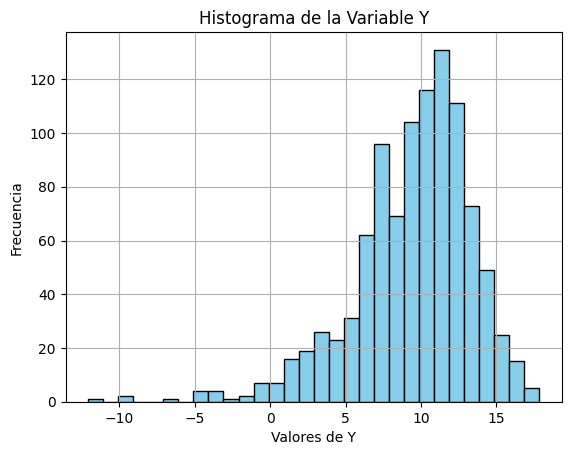

In [346]:
# Histograma para la columna Y
plt.hist(df2['Y'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histograma de la Variable Y')
plt.xlabel('Valores de Y')
plt.ylabel('Frecuencia')
plt.grid(True)

plt.show()

# ANÁLISIS BIVARIANTE

array([[<Axes: xlabel='Y', ylabel='Y'>, <Axes: xlabel='X', ylabel='Y'>],
       [<Axes: xlabel='Y', ylabel='X'>, <Axes: xlabel='X', ylabel='X'>]],
      dtype=object)

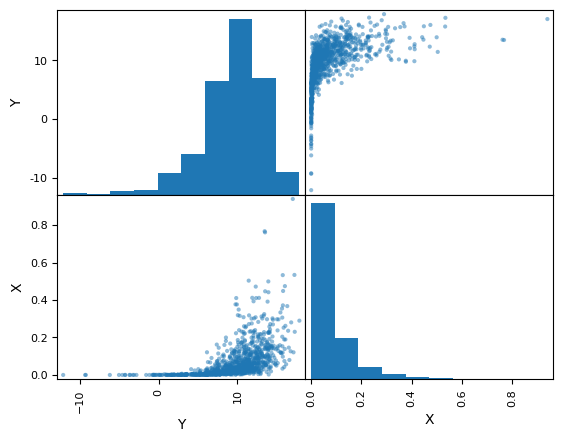

In [347]:
pd.plotting.scatter_matrix(df2[["Y", "X"]])

In [348]:
## calculando la correlación de pearson
print("============== Pearson =============")
print(df2.corr(method = "pearson"))

print("============== spearman =============")
### calculando la correlación de spearman
print(df2.corr(method = "spearman"))

print("============== kendall =============")
### calculando la correlación de kendall
print(df2.corr(method = "kendall"))

============== Pearson =============
          Y         X
Y  1.000000  0.520376
X  0.520376  1.000000
============== spearman =============
          Y         X
Y  1.000000  0.767833
X  0.767833  1.000000
============== kendall =============
          Y         X
Y  1.000000  0.580777
X  0.580777  1.000000


Se calculan las matrices de correlación, buscando información sobre la relación entre las variables X y Y.

*Correlación de Pearson: Se obtiene una correlación de 0.52, sugiriendo una relación moderada positiva entre "X" y "Y".

*Correlación de Spearman: Se obtiene una correlación 0.77, sugiriendo una correlación fuerte y positiva entre "X" y "Y".

*Correlación de Kendall: Se obtiene una correlación 0.58, sugiriendo una correlación moderada y positiva entre "X" y "Y".

Los resultados indican una correlación positiva entre las variables Y y X. La fuerza de esta correlación varía ligeramente según el método utilizado, pero en general, sugiere que existe una relación positiva entre las dos variables

# **TRANSFORMACIÓN PARA LA VARIABLE "X" Y MODELO DE REGRESIÓN LINEAL**

In [349]:
import numpy as np

# Aplicar la transformación logarítmica a la variable X
df2['X_log'] = np.log(df2['X'])

In [350]:
import statsmodels.api as sm

# Ajustar el modelo de regresión lineal
X = df2[['X_log']]  # Variable explicativa
y = df2['Y']        # Variable objetivo

# Agregar intercepto al conjunto de datos
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
model = sm.OLS(y, X).fit()

# Imprimir los resultados del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     2726.
Date:                Sun, 28 Apr 2024   Prob (F-statistic):          1.29e-287
Time:                        19:32:43   Log-Likelihood:                -2123.1
No. Observations:                1000   AIC:                             4250.
Df Residuals:                     998   BIC:                             4260.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.1706      0.127    119.481      0.0

Se aplica una transformación logarítmica a la variable 'X' utilizando la función logarítmica natural. Posterior a esta transformación, se procede a ajustar un modelo de regresión lineal mediante el método de mínimos cuadrados ordinarios (OLS), utilizando la variable transformada 'X_log' como variable explicativa y la variable 'Y' como variable objetivo.
<br>
<br>

De los valores obtenidos, se obtiene que la siguiente, es la función estimada que describe la relación entre la variable de respuesta Y y la variable explicativa X, según el modelo de regresión lineal ajustado.

\Y
\^
 =β₀ +β₁ ⋅Xlog​

Donde:

^
Y
^
  es la variable de respuesta (Y) estimada.

β₀  es el coeficiente de intersección (constante).


β₁ es el coeficiente asociado con la variable explicativa X_log

Encontrando que la siguiente es la función estimada de Y en función de X

^Y=15.1706+1.4987⋅ln(X)

# **Interpretación del Modelo Lineal**


*Coeficiente (coef): El coeficiente para la variable X_log es 1.4987. Esto sugiere que, en promedio, un aumento unitario en X_log está asociado con un aumento de aproximadamente 1.4987 unidades en Y.

<br>

*Valores p (P>|t|): El valor p obtenido en el modelo, para el coeficiente de X_log es 0.000, lo que sugiere que el efecto de X_log en Y es estadísticamente significativo.
<br>

*R-cuadrado: El modelo arroja un valor de R-cuadrado de 0.732, indicando que aproximadamente el 73.2% de la variabilidad en la variable de respuesta (Y) es explicada por la variable explicativa (X_log).
<br>
*F-statistic y valor p asociado: Se obtiene un valor p asociado significativamente bajo (1.29e-287), indicando que el modelo es estadísticamente significativo.

# VALIDACIÓN SUPUESTOS DEL MODELO

A continuación, se presenta la evaluación de los supuestos del modelo, encontrando que no hay evidencia para rechazar ningun de los supuestos  frente a los residuales.

In [351]:
residuals = model.resid

Supuesto 1 y supuesto 3 y 4: Los residuales son independientes,  Promedio de los  𝓔ᵢ= 0 y presentan varianza constante

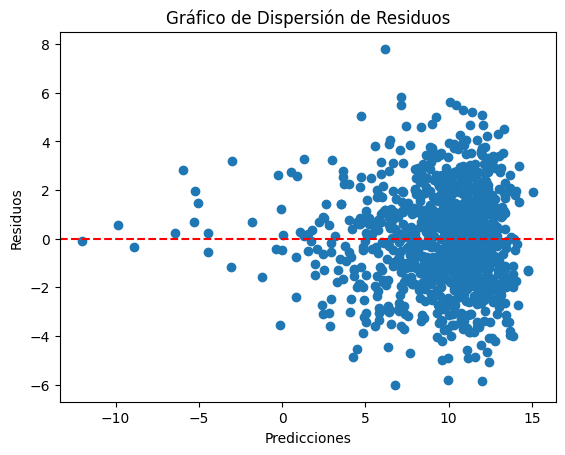

In [352]:
predictions = model.predict(X)

plt.scatter(predictions, residuals)
plt.title('Gráfico de Dispersión de Residuos')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

De acuerdo con el gráfico anterior, se encuentra que los residuos, no muestran un comportamiento constante al rededor del cero, especificamente, para valores mayores en el eje X, se observan mayor valores de residuo,  pareciera que los residuos están indicando  heterocedasticidad, es decir, que la varianza de los errores no es constante a lo largo del rango de predicciones.

A continuación se proceder a evaluar mediante tests de Breusch-Pagan y Durbin-Watson, si el comportamiento de los residuos presentan o no, heterocedasticidad y autocorrelación.

In [353]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Calcula el test de Breusch-Pagan
lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(residuals, X)

# Imprime los resultados
print("LM Estadístico:", lm)
print("P-valor LM:", lm_p_value)
print("F Estadístico:", fvalue)
print("P-valor F:", f_p_value)

LM Estadístico: 0.5282662931659354
P-valor LM: 0.46733665913366673
F Estadístico: 0.5274884149292246
P-valor F: 0.46783499688166175


Los resultados del test de Breusch-Pagan muestran que el estadístico LM es 0.528 y el valor p asociado es 0.467 para el estadístico LM. Además, el estadístico F es 0.527 con un valor p asociado de 0.468.

Dado que los valores p para ambos estadísticos, son mayores que 0.05, no hay suficiente evidencia para rechazar la hipótesis nula de homocedasticidad en los residuos. Los residuos parecen tener una varianza constante, lo que sugiere que no hay heterocedasticidad en el modelo.

In [354]:
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson

residuos = model.resid

# Calcular el estadístico de Durbin-Watson
statistic = durbin_watson(residuos)

# Imprimir el resultado
print("Estadístico de Durbin-Watson:", statistic)

Estadístico de Durbin-Watson: 1.9819250655292384


Dado que el valor obtenido para el estadístico de Durbin-Watson es aproximadamente 1.98, está cerca de 2, pareciera que no hay autocorrelación de primer orden en los residuos. En consecuencia, los residuos parecen ser independientes entre sí.

Supuesto 2: Los 𝓔ᵢ presentan una distribución Normal

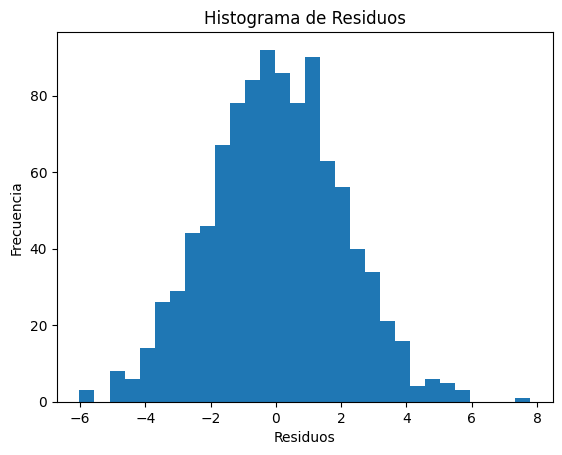

In [355]:
plt.hist(residuals, bins=30)
plt.title('Histograma de Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

In [356]:
#Test de Shapiro-Wilk para validación de Normalidad en los residuales

from scipy import stats

shapiro_result = stats.shapiro(residuals)

# Imprimir el resultado del test
print("Estadístico de Shapiro-Wilk:", shapiro_result.statistic)
print("P-valor:", shapiro_result.pvalue)

# Interpretar el resultado del test
alpha = 0.05
if shapiro_result.pvalue > alpha:
    print("No se puede rechazar la hipótesis nula. Los residuos siguen una distribución normal.")
else:
    print("Se rechaza la hipótesis nula. Los residuos no siguen una distribución normal.")

Estadístico de Shapiro-Wilk: 0.9991626739501953
P-valor: 0.9430762529373169
No se puede rechazar la hipótesis nula. Los residuos siguen una distribución normal.


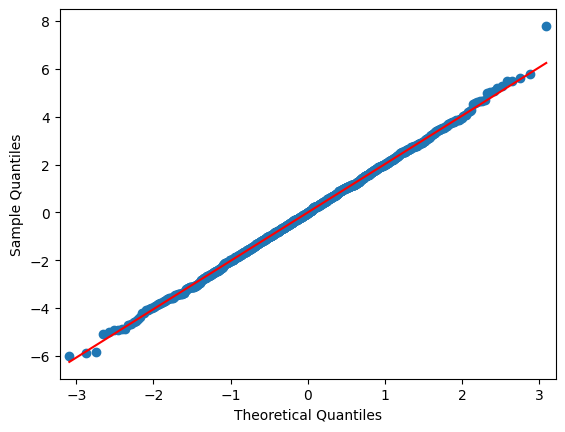

In [357]:
#import statsmodels.api as sm
import statsmodels.graphics.gofplots as smg

#  gráfico QQPlot
fig = smg.qqplot(residuals, line='s')

# Mostrar el gráfico
plt.show()

Considerando el acercamiento gráfico de los residuales del modelo, mediante el histograma de los residuales y el diagrama QQPlot, se pueden apreciar comportamientos de los residuales que se aproximan a una distribución Normal.
se realizó el test de Shapiro-Wilk, obteniendo un valor p de 0.943. Dado que este valor p es superior al nivel de significancia establecido, no se puede rechazar la hipótesis nula de normalidad. Por lo tanto, se concluye que los residuos se distribuyen de manera normal



## **NUMERAL 3**


In [358]:
import numpy as np

In [359]:
#Se excluyen dos filas ya que la primera fila se trata del título, y segunda fila es un espacio en blanco
df3 = pd.read_excel("datos.xls", sheet_name="Wine Quality", skiprows=2)
df3.head()

,Calidad del Vino,Acidez Fija,Acidez Volátil,Ácido Cítrico,Azúcar Residual,Cloruros,Dióxido de Azúfre Libre,Dióxido de Azúfre Total,Densidad,pH,Sulfatos,Alcohol
0,6,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,6,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,6,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,6,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [360]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Calidad del Vino         4898 non-null   int64  
 1   Acidez Fija              4898 non-null   float64
 2   Acidez Volátil           4898 non-null   float64
 3   Ácido Cítrico            4898 non-null   float64
 4   Azúcar Residual          4898 non-null   float64
 5   Cloruros                 4898 non-null   float64
 6   Dióxido de Azúfre Libre  4898 non-null   float64
 7   Dióxido de Azúfre Total  4898 non-null   float64
 8   Densidad                 4898 non-null   float64
 9   pH                       4898 non-null   float64
 10  Sulfatos                 4898 non-null   float64
 11  Alcohol                  4898 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [361]:
columnas_a_excluir = ["pH", "Sulfatos", "Cloruros", "Acidez Volátil", "Acidez Fija", "Calidad del Vino"]

# Crear un nuevo DataFrame excluyendo las columnas especificadas
df3 = df3.drop(columns=columnas_a_excluir)

columnas_ordenadas = ["Densidad"] + [col for col in df3.columns if col != "Densidad"]
df3 = df3[columnas_ordenadas]

array([[<Axes: xlabel='Densidad', ylabel='Densidad'>,
        <Axes: xlabel='Ácido Cítrico', ylabel='Densidad'>,
        <Axes: xlabel='Azúcar Residual', ylabel='Densidad'>,
        <Axes: xlabel='Dióxido de Azúfre Libre', ylabel='Densidad'>,
        <Axes: xlabel='Dióxido de Azúfre Total', ylabel='Densidad'>,
        <Axes: xlabel='Alcohol', ylabel='Densidad'>],
       [<Axes: xlabel='Densidad', ylabel='Ácido Cítrico'>,
        <Axes: xlabel='Ácido Cítrico', ylabel='Ácido Cítrico'>,
        <Axes: xlabel='Azúcar Residual', ylabel='Ácido Cítrico'>,
        <Axes: xlabel='Dióxido de Azúfre Libre', ylabel='Ácido Cítrico'>,
        <Axes: xlabel='Dióxido de Azúfre Total', ylabel='Ácido Cítrico'>,
        <Axes: xlabel='Alcohol', ylabel='Ácido Cítrico'>],
       [<Axes: xlabel='Densidad', ylabel='Azúcar Residual'>,
        <Axes: xlabel='Ácido Cítrico', ylabel='Azúcar Residual'>,
        <Axes: xlabel='Azúcar Residual', ylabel='Azúcar Residual'>,
        <Axes: xlabel='Dióxido de Azúfre Li

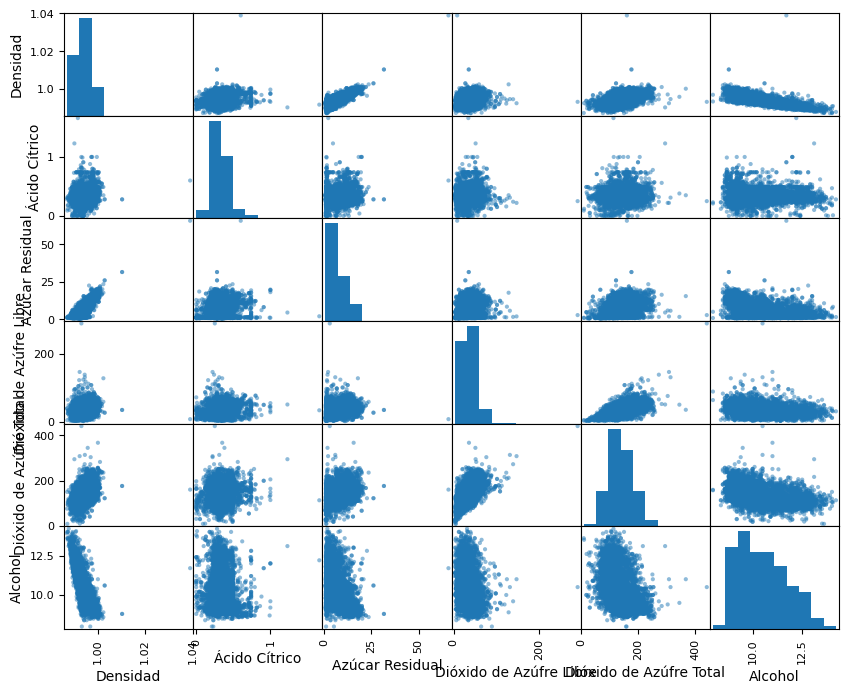

In [362]:
pd.plotting.scatter_matrix(df3, figsize=(10, 8))

In [363]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df3.drop("Densidad", axis = 1), df3["Densidad"], test_size=0.2, random_state=42)

In [364]:
y_train.values.reshape(-1,1)

array([[0.99272],
       [0.9968 ],
       [0.99268],
       ...,
       [0.99129],
       [0.99567],
       [0.99255]])

In [365]:
#Estandarización de las variables

from sklearn.preprocessing import StandardScaler

scalerX = StandardScaler() ### Esta linea instancia la clase que va a calcular la estandarización
scalerX.fit(X_train) ### Ajustamos el scaler a nuestros datos df
datosX_scaled = scalerX.transform(X_train) ### Así calculo la estandarización de los datos
dfX_scaled = pd.DataFrame(datosX_scaled, columns = X_train.columns)
print(dfX_scaled.head())


scalerY = StandardScaler()
scalerY.fit(y_train.values.reshape(-1,1))
datosY_scaled = scalerY.transform(y_train.values.reshape(-1,1)) ### Así calculo la estandarización de los datos
print(datosY_scaled)

   Ácido Cítrico  Azúcar Residual  Dióxido de Azúfre Libre  \
0       0.227731         0.340419                 0.534065   
1       0.895832         1.002071                 0.773947   
2      -0.022807         0.184737                -0.605377   
3       0.144218        -0.924503                -0.125612   
4      -0.607396         2.432407                 0.054300   

   Dióxido de Azúfre Total   Alcohol  
0                -0.641932  1.540371  
1                 1.355106 -0.821712  
2                -1.022320  0.481506  
3                -0.879675  0.237153  
4                 0.855846 -0.088652  
[[-0.44704073]
 [ 0.90336975]
 [-0.46028004]
 ...
 [-0.92034636]
 [ 0.52935901]
 [-0.50330783]]


In [366]:
#Mediante la matriz de covarianzas, se valida que los datos están estandazarizdos, se obtienen 1 en la diagonal
dfX_scaled.cov()

,Ácido Cítrico,Azúcar Residual,Dióxido de Azúfre Libre,Dióxido de Azúfre Total,Alcohol
Ácido Cítrico,1.000255,0.092536,0.098112,0.122396,-0.062996
Azúcar Residual,0.092536,1.000255,0.306096,0.406054,-0.453598
Dióxido de Azúfre Libre,0.098112,0.306096,1.000255,0.614348,-0.257323
Dióxido de Azúfre Total,0.122396,0.406054,0.614348,1.000255,-0.454558
Alcohol,-0.062996,-0.453598,-0.257323,-0.454558,1.000255


In [367]:
datosY_scaled.reshape(1, -1)

array([[-0.44704073,  0.90336975, -0.46028004, ..., -0.92034636,
         0.52935901, -0.50330783]])

In [369]:
#Se ubica a la variable Densidad como primer Variable de izquierda a derecha dentro del conjunto del dataset
df_scaled = dfX_scaled
df_scaled["Densidad"] = datosY_scaled.reshape(1, -1)[0]

df_scaled = df_scaled[["Densidad", "Ácido Cítrico", "Azúcar Residual", "Dióxido de Azúfre Libre","Dióxido de Azúfre Total","Alcohol"]]

# Cambiar los nombres de las columnas
df_scaled = df_scaled.rename(columns={"Dióxido de Azúfre Libre": "DióxidoAL", "Ácido Cítrico": "ÁcidoC", "Azúcar Residual": "AzúcarR",
                                      "Dióxido de Azúfre Total": "DióxidoZT"})

# Reordenar las columnas
df_scaled = df_scaled[["Densidad", "ÁcidoC", "AzúcarR", "DióxidoAL", "DióxidoZT", "Alcohol"]]

df_scaled.head()

,Densidad,ÁcidoC,AzúcarR,DióxidoAL,DióxidoZT,Alcohol
0,-0.447041,0.227731,0.340419,0.534065,-0.641932,1.540371
1,0.903370,0.895832,1.002071,0.773947,1.355106,-0.821712
2,-0.460280,-0.022807,0.184737,-0.605377,-1.022320,0.481506
3,-0.304718,0.144218,-0.924503,-0.125612,-0.879675,0.237153
4,1.883079,-0.607396,2.432407,0.054300,0.855846,-0.088652


# Cálculo de las matrices de correlación

In [370]:
## calculando la correlación de pearson
print("============== Pearson =============")
print(df_scaled.corr(method="pearson").round(3))  # Redondear a 2 cifras decimales

print("============== spearman =============")
### calculando la correlación de spearman
print(df_scaled.corr(method="spearman").round(3))  # Redondear a 2 cifras decimales

print("============== kendall =============")
### calculando la correlación de kendall
print(df_scaled.corr(method="kendall").round(3))  # Redondear a 2 cifras decimales

============== Pearson =============
           Densidad  ÁcidoC  AzúcarR  DióxidoAL  DióxidoZT  Alcohol
Densidad      1.000   0.143    0.843      0.300      0.532   -0.775
ÁcidoC        0.143   1.000    0.093      0.098      0.122   -0.063
AzúcarR       0.843   0.093    1.000      0.306      0.406   -0.453
DióxidoAL     0.300   0.098    0.306      1.000      0.614   -0.257
DióxidoZT     0.532   0.122    0.406      0.614      1.000   -0.454
Alcohol      -0.775  -0.063   -0.453     -0.257     -0.454    1.000
============== spearman =============
           Densidad  ÁcidoC  AzúcarR  DióxidoAL  DióxidoZT  Alcohol
Densidad      1.000   0.088    0.781      0.329      0.565   -0.823
ÁcidoC        0.088   1.000    0.026      0.092      0.094   -0.021
AzúcarR       0.781   0.026    1.000      0.345      0.429   -0.449
DióxidoAL     0.329   0.092    0.345      1.000      0.622   -0.275
DióxidoZT     0.565   0.094    0.429      0.622      1.000   -0.479
Alcohol      -0.823  -0.021   -0.449     

Considerando los valores obtenidos en las matrices de correlación, se resaltan las siguientes observaciones sobre las estructuras de dependencia entre las variables:

***En la matriz de correlación de Pearson:***
<br>
*La densidad parece estar altamente correlacionada con el azúcar residual (0.843) y moderadamente correlacionada con el dióxido de azufre libre (0.300) y el dióxido de azufre total (0.532). Además, muestra una correlación negativa fuerte con el alcohol (-0.775).

*El alcohol parece estar negativamente correlacionado con la densidad (-0.775).
Las otras correlaciones son relativamente bajas.
<br>

***En la matriz de correlación de Spearman:***
Se observan patrones similares a la matriz de correlación de Pearson, pero las correlaciones tienden a ser ligeramente menores.

La densidad aún muestra una alta correlación con el azúcar residual (0.781) y correlaciones negativas fuertes con el alcohol (-0.823).

***En la matriz de correlación de Kendall:***
Los patrones generales son similares a las matrices anteriores, pero las correlaciones tienden a ser más bajas.

En resumen, las estructuras de dependencia observadas en las tres matrices indican ciertas relaciones entre las variables, destacando especialmente la relación entre la densidad y el azúcar residual, así como la relación inversa entre la densidad y el alcohol.

**MODELO DE REGRESIÓN LINEAL**

Dado que los datos del modelo de regresión se encuentran estandarizado, se procede a  calcular los coeficientes regresión directamente con la matrix de correlaciones $C$ de la sigueinte forma

$$\beta_{1\ldots p}=C_{XX}^{-1}C_Xy \hspace{1 cm} \beta_0=0$$

Partiendo de los datos estandarizados, y tomando como variable respuesta Columna Densidad, se han construído 3 modelos RLM partiendo de las matrices de correlación calculadas mediante los métodos Pearson, Kendall y Spearman.

Para los 3 modelos se calcula el RMSE de la predicción, obteniendo los siguientes valores para cada modelo, encontrado que el Modelo calculado a partir de la matriz de correlación de kendall, reduce las desviaciones de las predicción del modelo, respecto a los valores reales, comparados con los otros dos modelos RLM calculados.

<br>
RMSE (Pearson)= 1.3863748432263951
<br>
RMSE (Kendall)= 1.2968506359111867
<br>
RMSE (Spearman)= 1.3875694897018205
<br>

Ninguno de los tres modelos de RLM calculados, cumplen los supuestos.



In [371]:
#A continuación se calculan los coeficientes de regresión mediante la expresión anterior de matriz de correlación

#Definimos una función que permita hacer el cálculo de los coeficientes mediante diferentes métodos

def RLC(df_scaled, method_name):

  C = df_scaled.corr(method = method_name)

  CXX = C.to_numpy()[1:, 1:] #Definición de la matriz CXX No considera la primera columna ni la primera fila, la cual hace referencia a la variable "Densidad" que es la variable respuesta

  CXy = C.to_numpy()[1:, 0] #Definición del Vecto CXY Vector de correlación de las variables de entrada respecto a la variable respuesta

  betas = np.matmul(np.linalg.inv(CXX), CXy) #Cálculo de los Betas

  return betas

MODELO DE REGRESIÓN LINEAL MEDIANTE EL CÁLCULO DE COEFICIENTES USANDO SPEARMAN

In [372]:
#A continuación se calculan los coeficientes de regresión mediante la expresión anterior de matriz de correlación
#Método Spearman
#B0=0 considerando que los datos están estandarizados

betas = RLC(df_scaled, "spearman")
betas
#Los valores de Beta mayores, representan mayor dependencia a la variable

# Imprimir el mensaje en pantalla
print("La siguiente es la expresión del modelo calculado, estimando los coeficientes de regresión mediante la matriz de correlación obtenida usando Spearman, ")
print("y= "+"β₁" + str(betas[0]) + " + " + "β₂" + str(betas[1]) + " + "+ "β₃" + str(betas[2]) + " + "+ "β₄" + str(betas[3]) +" + "+ "β₅" + str(betas[4]))


La siguiente es la expresión del modelo calculado, estimando los coeficientes de regresión mediante la matriz de correlación obtenida usando Spearman, 
y= β₁0.05867343935724025 + β₂0.5025917375311487 + β₃-0.08268649813250813 + β₄0.1280182883982286 + β₅-0.557513820380729


Siendo β₁ asociado a los valores obtenidos por la variable Ácido Cítrico
<br>
β₂ asociado a los valores obtenidos por la variable Azúcar Residual
<br>
β₃ asociado a los valores obtenidos por la variable Dióxido de Azúfre Libre
<br>
β₄ asociado a los valores obtenidos por la variable Dióxido de Azúfre Total
<br>
β₅ asociado a los valores obtenidos por la variable Alcohol





In [373]:
X_test_scaled = scalerX.transform(X_test)

y_test_pred = np.matmul(X_test_scaled, betas) #

In [374]:
residuales = y_test_pred - scalerY.transform(y_test.values.reshape(-1, 1)).reshape(1, -1)[0]

In [375]:
from sklearn.metrics import mean_squared_error

# Calcular el RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("En promedio, las predicciones del modelo tienen un error de aproximadamente:", rmse)

En promedio, las predicciones del modelo tienen un error de aproximadamente: 1.3875694897018205


Considerando que las variables del modelo, están estandarizadas, el RMSE obtenido, indica que en promedio, las predicciones del modelo mediante el método Spearman,  están desviadas de los valores reales en alrededor de 1.3876 desviaciones estándar de la variable objetivo (Densidad).

## Validación de supuestos (Spearman)

Mediante la evaluación de los supuestos del modelo, presentada a continuación, se encuentra que  hay evidencia significativa para rechazar la hipótesis nula de homocedasticidad. Por lo tanto, se concluye que hay heterocedasticidad en los residuos del modelo, adicionalmente, se rechaza la hipótesis nula en el test Shapiro-Wilk; Los residuos no siguen una distribución normal.

En resumen, dado que se encuentra evidencia de heterocedasticidad y no se cumple el supuesto de normalidad de los residuos, no es correcto el uso del modelo y tendría que revisarse técnicas de modelado alternativas o ajustes en el modelo para abordar estas deficiencias y mejorar la precisión de las estimaciones.

Supuesto 1 y supuesto 3 y 4: Los residuales son independientes, Promedio de los 𝓔ᵢ= 0 y presentan varianza constante

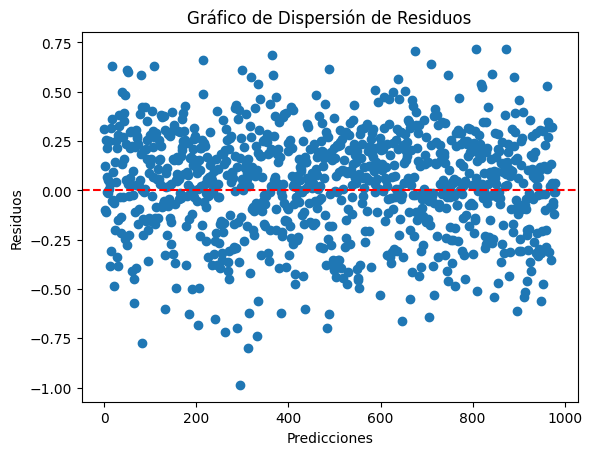

In [376]:
plt.scatter(x=range(len(residuales)), y=residuales)
plt.title('Gráfico de Dispersión de Residuos')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.axhline(y=0, color='r', linestyle='--')  # Agregar línea horizontal en y=0
plt.show()

predictions = model.predict(X)


De acuerdo con el gráfico anterior, se encuentra que los residuos, parecieran mostrar un comportamiento constante al rededor de cero, sin embargo pareciera mostrar una  leve concentración en valores superiores a cero.

A continuación se proceder a evaluar mediante tests de Breusch-Pagan y Durbin-Watson, si el comportamiento de los residuos presentan o no, heterocedasticidad y autocorrelación.

In [377]:
import statsmodels.api as sm

# Ajusta un modelo auxiliar para explicar la varianza de los residuos
X_auxiliar = X_test  # Puedes utilizar las variables originales o alguna transformación de estas
X_auxiliar = sm.add_constant(X_auxiliar)  # Agrega una constante si es necesario
model_auxiliar = sm.OLS(np.square(residuales), X_auxiliar)
results_auxiliar = model_auxiliar.fit()

# Calcula el estadístico LM para el test de Breusch-Pagan
BP_statistic = results_auxiliar.rsquared
# Calcula el p-valor asociado al estadístico LM
p_valor_BP = results_auxiliar.f_pvalue

# Imprime los resultados
print("Estadístico de Breusch-Pagan:", BP_statistic)
print("P-valor del test de Breusch-Pagan:", p_valor_BP)

Estadístico de Breusch-Pagan: 0.0787179197318052
P-valor del test de Breusch-Pagan: 8.475640489544817e-16


Teniendo en cuenta los resultados del test de Breusch-Pagan, dado un valor p significativamente bajo,  hay evidencia significativa para rechazar la hipótesis nula de homocedasticidad. Por lo tanto, se concluye que hay heterocedasticidad en los residuos del modelo

In [378]:
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson

residuos = model.resid

# Calcular el estadístico de Durbin-Watson
statistic = durbin_watson(residuales)

# Imprimir el resultado
print("Estadístico de Durbin-Watson:", statistic)

Estadístico de Durbin-Watson: 2.037480948464386


Dado que el valor obtenido para el estadístico de Durbin-Watson es aproximadamente 2.0375, está cerca de 2, pareciera que no hay autocorrelación de primer orden en los residuos. En consecuencia, los residuos parecen ser independientes entre sí.

Supuesto 2: Los 𝓔ᵢ presentan una distribución Normal

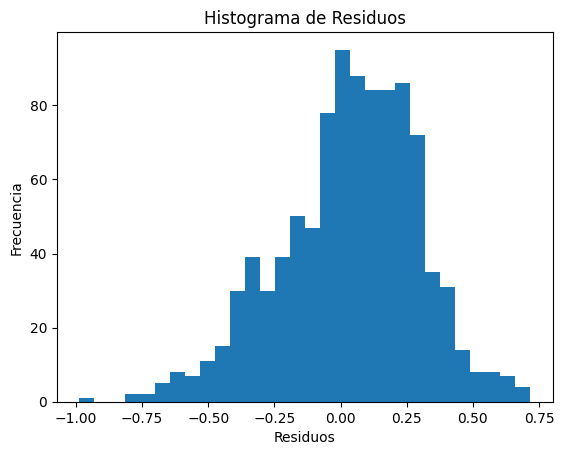

In [379]:
plt.hist(residuales, bins=30)
plt.title('Histograma de Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

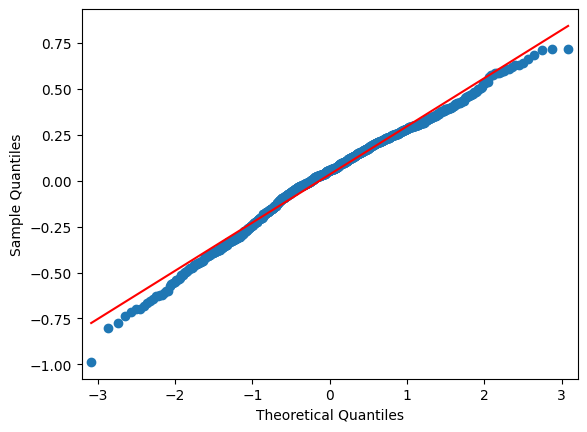

In [380]:
#import statsmodels.api as sm
import statsmodels.graphics.gofplots as smg

#  gráfico QQPlot
fig = smg.qqplot(residuales, line='s')

# Mostrar el gráfico
plt.show()

In [ ]:
#Test de Shapiro-Wilk para validación de Normalidad en los residuales

from scipy import stats

shapiro_result = stats.shapiro(residuales)

# Imprimir el resultado del test
print("Estadístico de Shapiro-Wilk:", shapiro_result.statistic)
print("P-valor:", shapiro_result.pvalue)

# Interpretar el resultado del test
alpha = 0.05
if shapiro_result.pvalue > alpha:
    print("No se puede rechazar la hipótesis nula. Los residuos siguen una distribución normal.")
else:
    print("Se rechaza la hipótesis nula. Los residuos no siguen una distribución normal.")

**MODELO DE REGRESIÓN LINEAL MEDIANTE EL CÁLCULO DE COEFICIENTES USANDO KENDALL**

In [ ]:
#A continuación se calculan los coeficientes de regresión mediante la expresión anterior de matriz de correlación
#Método Kendall
#B0=0 considerando que los datos están estandarizados

betas = RLC(df_scaled, "kendall")
betas
#Los valores de Beta mayores, representan mayor dependencia a la variable

# Imprimir el mensaje en pantalla
print("La siguiente es la expresión del modelo calculado, estimando los coeficientes de regresión mediante la matriz de correlación obtenida usando Spearman, ")
print("y= "+"β₁" + str(betas[0]) + " + " + "β₂" + str(betas[1]) + " + "+ "β₃" + str(betas[2]) + " + "+ "β₄" + str(betas[3]) +" + "+ "β₅" + str(betas[4]))

Siendo β₁ asociado a los valores obtenidos por la variable Ácido Cítrico
<br>
β₂ asociado a los valores obtenidos por la variable Azúcar Residual
<br>
β₃ asociado a los valores obtenidos por la variable Dióxido de Azúfre Libre
<br>
β₄ asociado a los valores obtenidos por la variable Dióxido de Azúfre Total
<br>
β₅ asociado a los valores obtenidos por la variable Alcohol

In [381]:
X_test_scaled = scalerX.transform(X_test)

y_test_pred = np.matmul(X_test_scaled, betas)

In [382]:
# Calculo de RMSE Root Mean Squared Error

from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("En promedio, las predicciones del modelo tienen un error de aproximadamente:", rmse)

En promedio, las predicciones del modelo tienen un error de aproximadamente: 1.3875694897018205


Considerando que las variables del modelo, están estandarizadas, el RMSE obtenido, indica que en promedio, las predicciones del modelo mediante el método Kendall, están desviadas de los valores reales en alrededor de 1.2969 desviaciones estándar de la variable objetivo (Densidad).

In [383]:
residuales = y_test_pred - scalerY.transform(y_test.values.reshape(-1, 1)).reshape(1, -1)[0]

**Validación de supuestos (KENDALL)**

Mediante la evaluación de los supuestos del modelo, presentada a continuación, se encuentra que hay evidencia significativa para rechazar la hipótesis nula de homocedasticidad. Por lo tanto, se concluye que hay heterocedasticidad en los residuos del modelo, adicionalmente, se rechaza la hipótesis nula en el test Shapiro-Wilk; Los residuos no siguen una distribución normal.

En resumen, dado que se encuentra evidencia de heterocedasticidad y no se cumple el supuesto de normalidad de los residuos, no es correcto el uso del modelo y tendría que revisarse técnicas de modelado alternativas o ajustes en el modelo para abordar estas deficiencias y mejorar la precisión de las estimaciones.

Supuesto 1 y supuesto 3 y 4: Los residuales son independientes, Promedio de los 𝓔ᵢ= 0 y presentan varianza constante

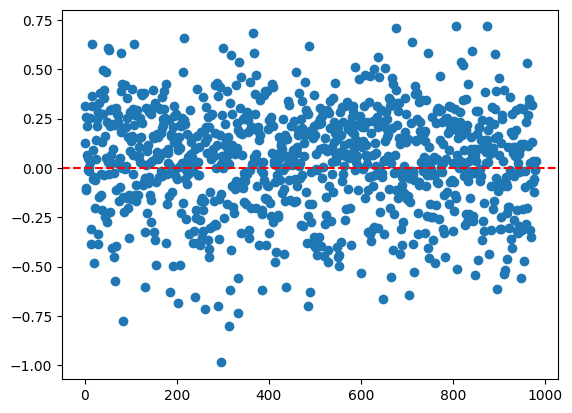

In [384]:
plt.scatter(x=range(len(residuales)), y=residuales)
plt.axhline(y=0, color='r', linestyle='--')  # Agregar línea horizontal en y=0
plt.show()

De acuerdo con el gráfico anterior, se encuentra que los residuos, parecieran mostrar un comportamiento constante al rededor de cero, sin embargo pareciera mostrar una leve concentración en valores superiores a cero.

A continuación se proceder a evaluar mediante tests de Breusch-Pagan y Durbin-Watson, si el comportamiento de los residuos presentan o no, heterocedasticidad y autocorrelación.

In [385]:
import statsmodels.api as sm

# Ajusta un modelo auxiliar para explicar la varianza de los residuos
X_auxiliar = X_test  # Puedes utilizar las variables originales o alguna transformación de estas
X_auxiliar = sm.add_constant(X_auxiliar)  # Agrega una constante si es necesario
model_auxiliar = sm.OLS(np.square(residuales), X_auxiliar)
results_auxiliar = model_auxiliar.fit()

# Calcula el estadístico LM para el test de Breusch-Pagan
BP_statistic = results_auxiliar.rsquared
# Calcula el p-valor asociado al estadístico LM
p_valor_BP = results_auxiliar.f_pvalue

# Imprime los resultados
print("Estadístico de Breusch-Pagan:", BP_statistic)
print("P-valor del test de Breusch-Pagan:", p_valor_BP)

Estadístico de Breusch-Pagan: 0.0787179197318052
P-valor del test de Breusch-Pagan: 8.475640489544817e-16


Teniendo en cuenta los resultados del test de Breusch-Pagan, dado un valor p significativamente bajo, hay evidencia significativa para rechazar la hipótesis nula de homocedasticidad. Por lo tanto, se concluye que hay heterocedasticidad en los residuos del modelo

In [386]:
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson

residuos = model.resid

# Calcular el estadístico de Durbin-Watson
statistic = durbin_watson(residuales)

# Imprimir el resultado
print("Estadístico de Durbin-Watson:", statistic)

Estadístico de Durbin-Watson: 2.037480948464386


Supuesto 2: Los 𝓔ᵢ presentan una distribución Normal

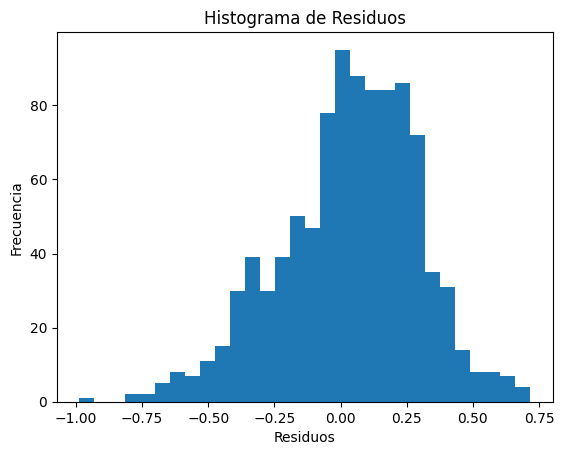

In [387]:
plt.hist(residuales, bins=30)
plt.title('Histograma de Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

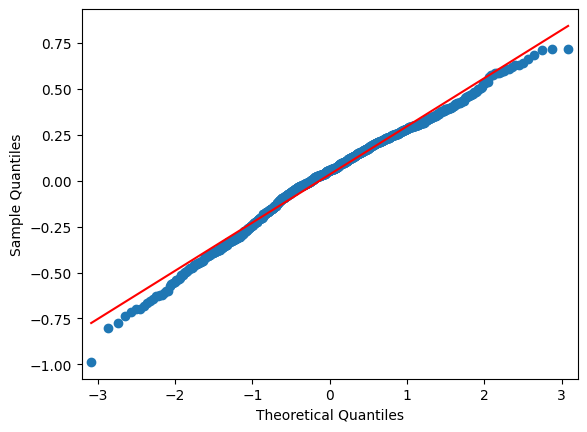

In [388]:
#import statsmodels.api as sm
import statsmodels.graphics.gofplots as smg

#  gráfico QQPlot
fig = smg.qqplot(residuales, line='s')

# Mostrar el gráfico
plt.show()

In [389]:
#Test de Shapiro-Wilk para validación de Normalidad en los residuales

from scipy import stats

shapiro_result = stats.shapiro(residuales)

# Imprimir el resultado del test
print("Estadístico de Shapiro-Wilk:", shapiro_result.statistic)
print("P-valor:", shapiro_result.pvalue)

# Interpretar el resultado del test
alpha = 0.05
if shapiro_result.pvalue > alpha:
    print("No se puede rechazar la hipótesis nula. Los residuos siguen una distribución normal.")
else:
    print("Se rechaza la hipótesis nula. Los residuos no siguen una distribución normal.")

Estadístico de Shapiro-Wilk: 0.9878917336463928
P-valor: 3.1020792334857106e-07
Se rechaza la hipótesis nula. Los residuos no siguen una distribución normal.


**MODELO DE REGRESIÓN LINEAL MEDIANTE EL CÁLCULO DE COEFICIENTES USANDO PEARSON**

In [390]:
#A continuación se calculan los coeficientes de regresión mediante la expresión anterior de matriz de correlación
#Método pearson
#B0=0 considerando que los datos están estandarizados

betas = RLC(df_scaled, "pearson")
betas
#Los valores de Beta mayores, representan mayor dependencia a la variable

# Imprimir el mensaje en pantalla
print("La siguiente es la expresión del modelo calculado, estimando los coeficientes de regresión mediante la matriz de correlación obtenida usando Spearman, ")
print("y= "+"β₁" + str(betas[0]) + " + " + "β₂" + str(betas[1]) + " + "+ "β₃" + str(betas[2]) + " + "+ "β₄" + str(betas[3]) +" + "+ "β₅" + str(betas[4]))

La siguiente es la expresión del modelo calculado, estimando los coeficientes de regresión mediante la matriz de correlación obtenida usando Spearman, 
y= β₁0.05154898889384292 + β₂0.604628470882759 + β₃-0.0833978430754211 + β₄0.12011899954889152 + β₅-0.46400145920757196


Siendo β₁ asociado a los valores obtenidos por la variable Ácido Cítrico
<br>
β₂ asociado a los valores obtenidos por la variable Azúcar Residual
<br>
β₃ asociado a los valores obtenidos por la variable Dióxido de Azúfre Libre
<br>
β₄ asociado a los valores obtenidos por la variable Dióxido de Azúfre Total
<br>
β₅ asociado a los valores obtenidos por la variable Alcohol

In [391]:
X_test_scaled = scalerX.transform(X_test)

y_test_pred = np.matmul(X_test_scaled, betas) #

In [392]:
# Calculo de RMSE Root Mean Squared Error

from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("En promedio, las predicciones del modelo tienen un error de aproximadamente:", rmse)

En promedio, las predicciones del modelo tienen un error de aproximadamente: 1.3863748432263951


Considerando que las variables del modelo, están estandarizadas, el RMSE obtenido, indica que en promedio, las predicciones del modelo mediante el método Pearson, están desviadas de los valores reales en alrededor de 1.38 desviaciones estándar de la variable objetivo (Densidad).

In [393]:
residuales = y_test_pred - scalerY.transform(y_test.values.reshape(-1, 1)).reshape(1, -1)[0]

# Validación de supuestos

Mediante la evaluación de los supuestos del modelo, presentada a continuación, se encuentra que hay evidencia significativa para rechazar la hipótesis nula de homocedasticidad. Por lo tanto, se concluye que hay heterocedasticidad en los residuos del modelo, adicionalmente, se rechaza la hipótesis nula en el test Shapiro-Wilk; Los residuos no siguen una distribución normal.

En resumen, dado que se encuentra evidencia de heterocedasticidad y no se cumple el supuesto de normalidad de los residuos, no es correcto el uso del modelo y tendría que revisarse técnicas de modelado alternativas o ajustes en el modelo para abordar estas deficiencias y mejorar la precisión de las estimaciones.

Supuesto 1 y supuesto 3 y 4: Los residuales son independientes, Promedio de los 𝓔ᵢ= 0 y presentan varianza constante

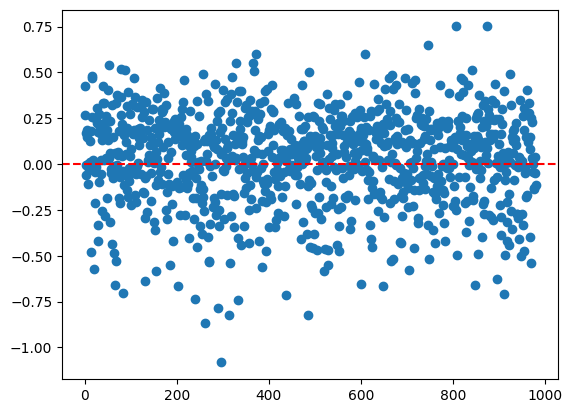

In [394]:
plt.scatter(x=range(len(residuales)), y=residuales)
plt.axhline(y=0, color='r', linestyle='--')  # Agregar línea horizontal en y=0
plt.show()

De acuerdo con el gráfico anterior, se encuentra que los residuos, parecieran mostrar un comportamiento constante al rededor de cero.

A continuación se proceder a evaluar mediante tests de Breusch-Pagan y Durbin-Watson, si el comportamiento de los residuos presentan o no, heterocedasticidad y autocorrelación.

In [395]:
import statsmodels.api as sm

# Ajusta un modelo auxiliar para explicar la varianza de los residuos
X_auxiliar = X_test  # Puedes utilizar las variables originales o alguna transformación de estas
X_auxiliar = sm.add_constant(X_auxiliar)  # Agrega una constante si es necesario
model_auxiliar = sm.OLS(np.square(residuales), X_auxiliar)
results_auxiliar = model_auxiliar.fit()

# Calcula el estadístico LM para el test de Breusch-Pagan
BP_statistic = results_auxiliar.rsquared
# Calcula el p-valor asociado al estadístico LM
p_valor_BP = results_auxiliar.f_pvalue

# Imprime los resultados
print("Estadístico de Breusch-Pagan:", BP_statistic)
print("P-valor del test de Breusch-Pagan:", p_valor_BP)

Estadístico de Breusch-Pagan: 0.04044358779539048
P-valor del test de Breusch-Pagan: 1.3158629383755727e-07


Teniendo en cuenta los resultados del test de Breusch-Pagan, dado un valor p significativamente bajo, hay evidencia significativa para rechazar la hipótesis nula de homocedasticidad. Por lo tanto, se concluye que hay heterocedasticidad en los residuos del modelo

In [396]:
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson

residuos = model.resid

# Calcular el estadístico de Durbin-Watson
statistic = durbin_watson(residuales)

# Imprimir el resultado
print("Estadístico de Durbin-Watson:", statistic)

Estadístico de Durbin-Watson: 1.996266746756021


Dado que el valor obtenido para el estadístico de Durbin-Watson es aproximadamente 2.0375, está cerca de 2, pareciera que no hay autocorrelación de primer orden en los residuos. En consecuencia, los residuos parecen ser independientes entre sí

Supuesto 2: Los 𝓔ᵢ presentan una distribución Normal

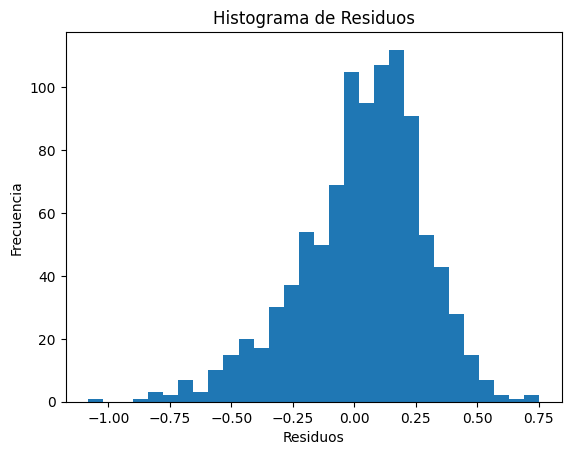

In [397]:
plt.hist(residuales, bins=30)
plt.title('Histograma de Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

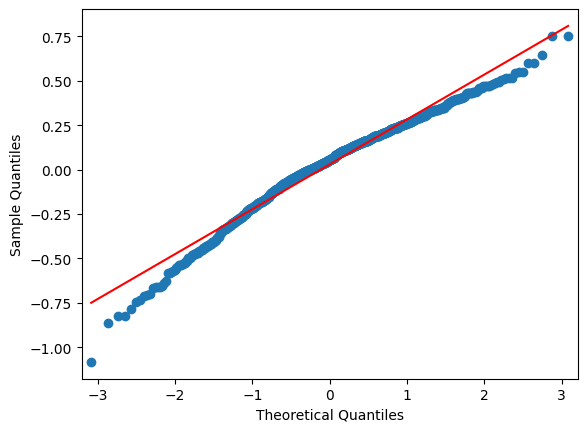

In [398]:
#import statsmodels.api as sm
import statsmodels.graphics.gofplots as smg

#  gráfico QQPlot
fig = smg.qqplot(residuales, line='s')

# Mostrar el gráfico
plt.show()

In [399]:
#Test de Shapiro-Wilk para validación de Normalidad en los residuales

from scipy import stats

shapiro_result = stats.shapiro(residuales)

# Imprimir el resultado del test
print("Estadístico de Shapiro-Wilk:", shapiro_result.statistic)
print("P-valor:", shapiro_result.pvalue)

# Interpretar el resultado del test
alpha = 0.05
if shapiro_result.pvalue > alpha:
    print("No se puede rechazar la hipótesis nula. Los residuos siguen una distribución normal.")
else:
    print("Se rechaza la hipótesis nula. Los residuos no siguen una distribución normal.")

Estadístico de Shapiro-Wilk: 0.9757910370826721
P-valor: 1.0486822347999247e-11
Se rechaza la hipótesis nula. Los residuos no siguen una distribución normal.


**MODELO A PARTIR DE LA TRANSFORMACIÓN DE VARIABLES**

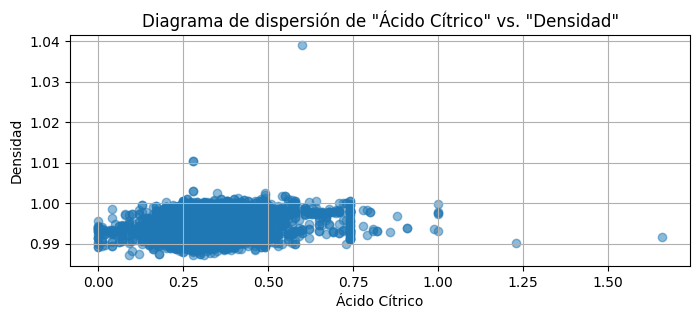

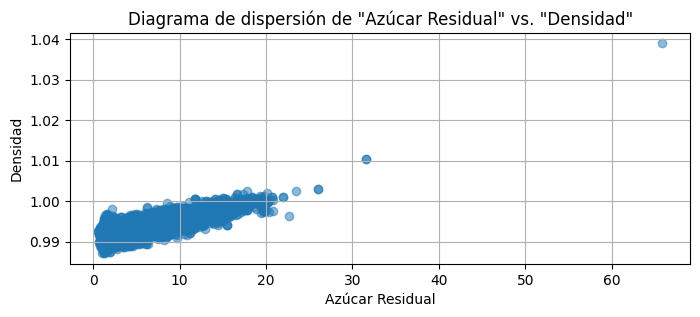

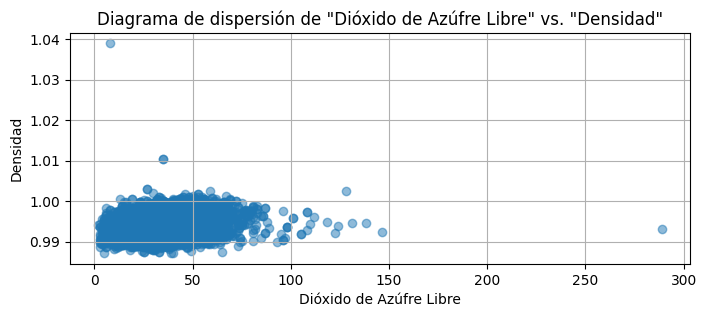

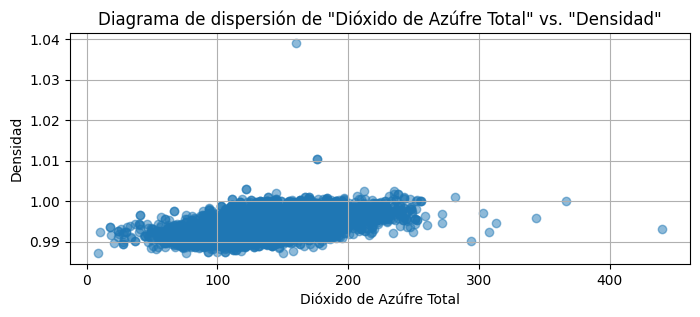

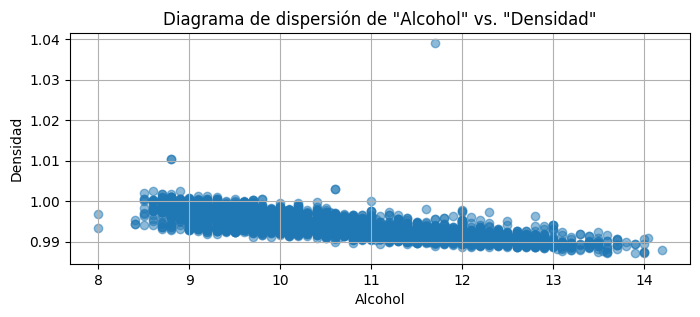

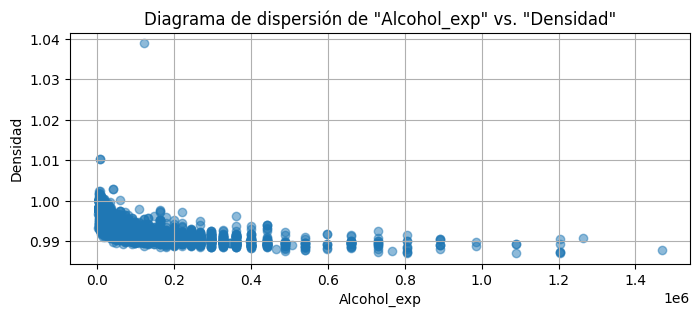

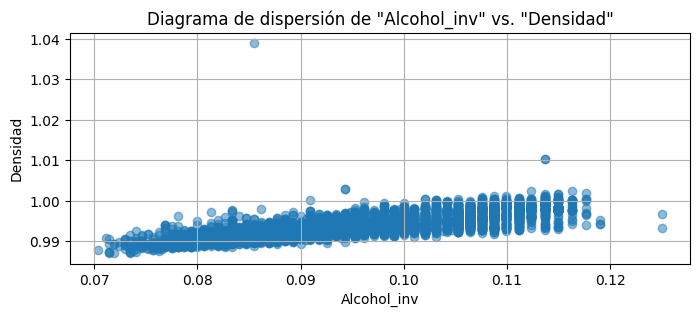

In [431]:
import matplotlib.pyplot as plt

# Obtener solo las columnas de df_scaled que deseas graficar
variables = df3.drop("Densidad", axis=1)

# Iterar sobre las columnas y graficar cada una contra la variable "Densidad"
for column in variables.columns:
    plt.figure(figsize=(8, 3))
    plt.scatter(df3[column], df3["Densidad"], alpha=0.5)
    plt.xlabel(column)
    plt.ylabel("Densidad")
    plt.title(f'Diagrama de dispersión de "{column}" vs. "Densidad"')
    plt.grid(True)
    plt.show()

In [414]:

#Modelo Alcohol vs Densidad sin considerar transformación de variable

import statsmodels.api as sm

# Ajustar el modelo de regresión lineal
X = df3['Alcohol']   # Variable explicativa
y = df3['Densidad']      # Variable objetivo

# Agregar intercepto al conjunto de datos
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
model = sm.OLS(y, X).fit()

# Imprimir los resultados del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Densidad   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     7613.
Date:                Sun, 28 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:25:05   Log-Likelihood:                 23816.
No. Observations:                4898   AIC:                        -4.763e+04
Df Residuals:                    4896   BIC:                        -4.761e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0140      0.000   4407.871      0.0

In [426]:
import numpy as np

df3['Alcohol_inv'] = 1 / df3['Alcohol']



In [427]:
#Modelo Alcohol vs Densidad considerando trasnformación de Variable 1/Alcohol

import statsmodels.api as sm

# Ajustar el modelo de regresión lineal
X = df3['Alcohol_inv']   # Variable explicativa
y = df3['Densidad']      # Variable objetivo

# Agregar intercepto al conjunto de datos
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
model = sm.OLS(y, X).fit()

# Imprimir los resultados del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Densidad   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     8043.
Date:                Sun, 28 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:49:22   Log-Likelihood:                 23899.
No. Observations:                4898   AIC:                        -4.779e+04
Df Residuals:                    4896   BIC:                        -4.778e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.9731      0.000   4153.950      

A partir de la transformación realizada la variable "Alcohol", se realiza un análisis comparativo de modelos OLS con, y sin transformación, de donde se tiene que:

MODELO 1(MODELO SIN TRANFORMACIÓN DE LA VARIABLE "ALCOHOL"):

R-cuadrado ajustado: 0.609
Coeficiente para la variable Alcohol: -0.0019

<br>
MODELO 2 (MODELO CONSIDERADNO TRANFORMACIÓN DE LA VARIABLE "ALCOHOL"):

R-cuadrado ajustado: 0.622
Coeficiente para la variable Alcohol_inv: 0.2166

<Bbr>
El modelo 2 tiene un R-cuadrado ajustado ligeramente mayor (0.622) en comparación con el modelo 1 (0.609), lo que sugiere que explica una mayor proporción de la variabilidad en la variable de respuesta (Densidad). Además, el coeficiente para la variable Alcohol_inv en el modelo 2 es significativamente diferente de cero y tiene un efecto positivo en la variable de respuesta.

Por lo tanto, en base a estos resultados, se podría concluir que el MODELO 2 es mejor en términos de ajuste y explicación de la variabilidad en la variable de respuesta.